<a href="https://colab.research.google.com/github/ShohamWeiss/NeuralNetworkTutorials/blob/master/TensorFlow_Tutorial_3.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Test Classifications with preprocessed text: Movie review

In [1]:
import tensorflow as tf

In [2]:
from tensorflow import keras

import tensorflow_datasets as tfds
tfds.disable_progress_bar()

import numpy as np

print(tf.__version__)

2.2.0


Download IMDB dataset

In [3]:
(train_data, test_data), info = tfds.load(
    # Using pre-encoded with 8k vocabulary.
    'imdb_reviews/subwords8k',
    # Returen the train test dataset as a tuple.
    split = (tfds.Split.TRAIN, tfds.Split.TEST),
    # Return (example, label) pairs from the dataset (instead of dictionary).
    as_supervised=True,
    # Also return the 'info' structure.
    with_info=True)

Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ2V3FQ/imdb_reviews-train.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ2V3FQ/imdb_reviews-test.tfrecord
Shuffling and writing examples to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0.incompleteZ2V3FQ/imdb_reviews-unsupervised.tfrecord
Dataset imdb_reviews downloaded and prepared to /root/tensorflow_datasets/imdb_reviews/subwords8k/1.0.0. Subsequent calls will reuse this data.


In [4]:
encoder = info.features['text'].encoder

In [6]:
print('Vocabulary size: {}'.format(encoder.vocab_size))

Vocabulary size: 8185


In [16]:
encoded_string = encoder.encode("Hello World.")
for ts in encoded_string:
  print( '{} ------> {}'.format(ts, encoder.decode([ts])))

4025 ------> Hell
222 ------> o 
2307 ------> Wor
1829 ------> ld
7975 ------> .


Exploring the data
***


In [41]:
for train_example, train_label in train_data.take(1):
  print('Encoded text:', train_example[:11].numpy())
  print('Label:', train_label.numpy())

Encoded text: [  62   18   41  604  927   65    3  644 7968   21   35]
Label: 0


numpy.ndarray

In [15]:
encoder.decode(train_example[:11])

"This was an absolutely terrible movie. Don't be "

Prepare the data for training
***

In [18]:
BUFFER_SIZE = 1000

train_batches = (
    train_data
    .shuffle(BUFFER_SIZE)
    .padded_batch(32)
)

test_batches = (
    test_data.
    padded_batch(32)
)

In [21]:
for example_batch, label_batch in train_batches.take(2):
  print("Batch shape: ", example_batch.shape)
  print("Label shape", label_batch.shape)

Batch shape:  (32, 858)
Label shape (32,)
Batch shape:  (32, 707)
Label shape (32,)


Building the model
***

In [22]:
model = keras.Sequential([
  keras.layers.Embedding(encoder.vocab_size, 16),
  keras.layers.GlobalAveragePooling1D(),
  keras.layers.Dense(1)])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 16)          130960    
_________________________________________________________________
global_average_pooling1d (Gl (None, 16)                0         
_________________________________________________________________
dense (Dense)                (None, 1)                 17        
Total params: 130,977
Trainable params: 130,977
Non-trainable params: 0
_________________________________________________________________


In [25]:
model.compile(optimizer='adam',
              loss=tf.losses.BinaryCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [31]:
history = model.fit(train_batches,
                    epochs=30,
                    validation_data=test_batches,
                    validation_steps=30)

Epoch 1/30
782/782 [==============================] - 6s 8ms/step - loss: 0.2753 - accuracy: 0.8925 - val_loss: 0.3605 - val_accuracy: 0.8448
Epoch 2/30
782/782 [==============================] - 6s 8ms/step - loss: 0.2633 - accuracy: 0.8968 - val_loss: 0.3535 - val_accuracy: 0.8542
Epoch 3/30
782/782 [==============================] - 6s 8ms/step - loss: 0.2500 - accuracy: 0.9030 - val_loss: 0.3486 - val_accuracy: 0.8667
Epoch 4/30
782/782 [==============================] - 6s 8ms/step - loss: 0.2404 - accuracy: 0.9072 - val_loss: 0.3460 - val_accuracy: 0.8667
Epoch 5/30
782/782 [==============================] - 7s 9ms/step - loss: 0.2309 - accuracy: 0.9107 - val_loss: 0.3479 - val_accuracy: 0.8656
Epoch 6/30
782/782 [==============================] - 6s 8ms/step - loss: 0.2226 - accuracy: 0.9163 - val_loss: 0.3469 - val_accuracy: 0.8646
Epoch 7/30
782/782 [==============================] - 6s 8ms/step - loss: 0.2161 - accuracy: 0.9195 - val_loss: 0.3434 - val_accuracy: 0.8635
Epoch 

In [32]:
loss, accuracy = model.evaluate(test_batches)

print("Loss: ", loss)
print("accuracy ", accuracy)

782/782 [==============================] - 4s 5ms/step - loss: 0.3785 - accuracy: 0.8650
Loss:  0.3785175383090973
accuracy  0.8649600148200989


Create a graph of accuracy and loss over time
***

In [33]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

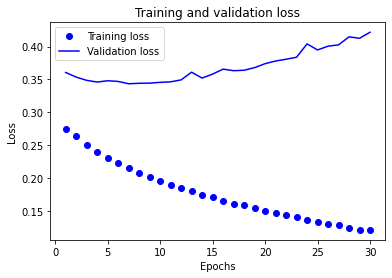

In [34]:
import matplotlib.pyplot as plt

acc = history_dict['accuracy']
val_acc = history_dict['val_accuracy']
loss = history_dict['loss']
val_loss = history_dict['val_loss']

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

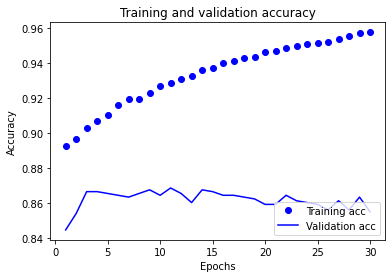

In [35]:
plt.clf()

plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

plt.show()

In [51]:
word = encoder.encode('hello world my name is shoham')
model.predict(word)

array([[-155.11946 ],
       [  85.689186],
       [ 377.49948 ],
       [ 119.38289 ],
       [-223.1277  ],
       [  59.008972],
       [-291.19516 ],
       [-293.51434 ]], dtype=float32)